## Student Performance Indicator

#### Life cycle of Machine learning Project

- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model

### 1) Problem statement
- This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.


### 2) Data Collection
- Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
- The data consists of 8 column and 1000 rows.

### 2.1 Import Data and Required Packages
####  Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
import typing
import warnings

warnings.filterwarnings("ignore")

#### Import the CSV Data as Pandas DataFrame

In [2]:
df = pd.read_csv("data/stud.csv")

#### Show top 5 records

In [3]:
df.head(5)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#### Shape of the dataset

In [4]:
df.shape

(1000, 8)

### 2.2 Dataset information

- gender : sex of students  -> (Male/female)
- race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
- parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
- lunch : having lunch before test (standard or free/reduced) 
- test preparation course : complete or not complete before test
- math score
- reading score
- writing score

### 3. Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

### 3.1 Check Missing Values

In [5]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

#### There are no missing values in the dataset

### 3.2 Check Duplicates

In [6]:
df.duplicated().sum()

np.int64(0)

#### There are no duplicate values in the dataset

### 3.3 Check data types

In [7]:
# checking null and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### 3.4 Checking the number of unique values of each column

In [ ]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

### 3.5 Check statistics of dataset

In [ ]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


#### Insight
    - From above description of numerical data all the means are very close to each other ranging between 66.08 to 68.05
  
    - All standard deviaions are also close, between 14.6 to 15.19
  
    - The minimum scores math reading and writing are 0,17 and 10 respectively. Reading with the highest minimum score of 17.

### 3.7 Exploring the data

In [ ]:
print("Categories in gender varibale:  ", end=" ")
print(df["gender"].unique())

print("Categories in race/ethnicity variable:  ", end=" ")
print(df["race_ethnicity"].unique())

print("Categories in parental level of education varibale:", end=" ")
print(df["parental_level_of_education"].unique())

print("Categories in lunch varibale:  ", end=" ")
print(df["lunch"].unique())

print("Categories in test preparation score varibale:  ", end=" ")
print(df["test_preparation_course"].unique())

Categories in gender varibale:   ['female' 'male']
Categories in race/ethnicity variable:   ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in parental level of education varibale: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in lunch varibale:   ['standard' 'free/reduced']
Categories in test preparation score varibale:   ['none' 'completed']


In [ ]:
# define numerical and categorical columns
numerical_features: list[str] = [
    feature for feature in df.columns if df[feature].dtype != "O"
]
categorical_features: list[str] = [
    feature for feature in df.columns if df[feature].dtype == "O"
]

# printing the columns
print(f"we have {len(numerical_features)} numerical features: {numerical_features}")
print(
    f"we have {len(categorical_features)} categorical features: {categorical_features}"
)

we have 3 numerical features: ['math_score', 'reading_score', 'writing_score']
we have 5 categorical features: ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


### 3.8 Creating columns for **Total Score** and **Average Score**

In [ ]:
df["total_score"] = df["math_score"] + df["reading_score"] + df["writing_score"]
df["avg_score"] = round(df["total_score"] / 3, 2)
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,avg_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.67
1,female,group C,some college,standard,completed,69,90,88,247,82.33


In [ ]:
# counting the number of students with full marks in each of the 3 subjects
math_full: int = df[df["math_score"] == 100]["avg_score"].count()
reading_full: int = df[df["reading_score"] == 100]["avg_score"].count()
writing_full: int = df[df["writing_score"] == 100]["avg_score"].count()

# printing the number of students with full marks in each subject
print(f"Number of students with full marks in math: {math_full}")
print(f"Number of students with full marks in reading: {reading_full}")
print(f"Number of students with full marks in writing: {writing_full}")

Number of students with full marks in math: 7
Number of students with full marks in reading: 17
Number of students with full marks in writing: 14


In [ ]:
# counting the numbers of students with less than or equal to 20 marks
math_less: int = df[df["math_score"] <= 20]["avg_score"].count()
reading_less: int = df[df["reading_score"] <= 20]["avg_score"].count()
writing_less: int = df[df["writing_score"] <= 20]["avg_score"].count()

# printing the number of students with less or equal to 20 marks in the 3 subjects
print(f"Number of students with 20 or less marks in math: {math_less}")
print(f"Number of students with 20 or less marks in reading: {reading_less}")
print(f"Number of students with 20 or less marks in writing: {writing_less}")

Number of students with 20 or less marks in math: 4
Number of students with 20 or less marks in reading: 1
Number of students with 20 or less marks in writing: 3


#### Insight
- From the above values it is determined that students are performing worse in math
- Students are performing best in reading

### 4 Exploring Data **( Visualization )**

#### 4.1 Visualize average score distribution to make some conclusion

- Histogram
- Kernel Distribution Function **( KDE )**

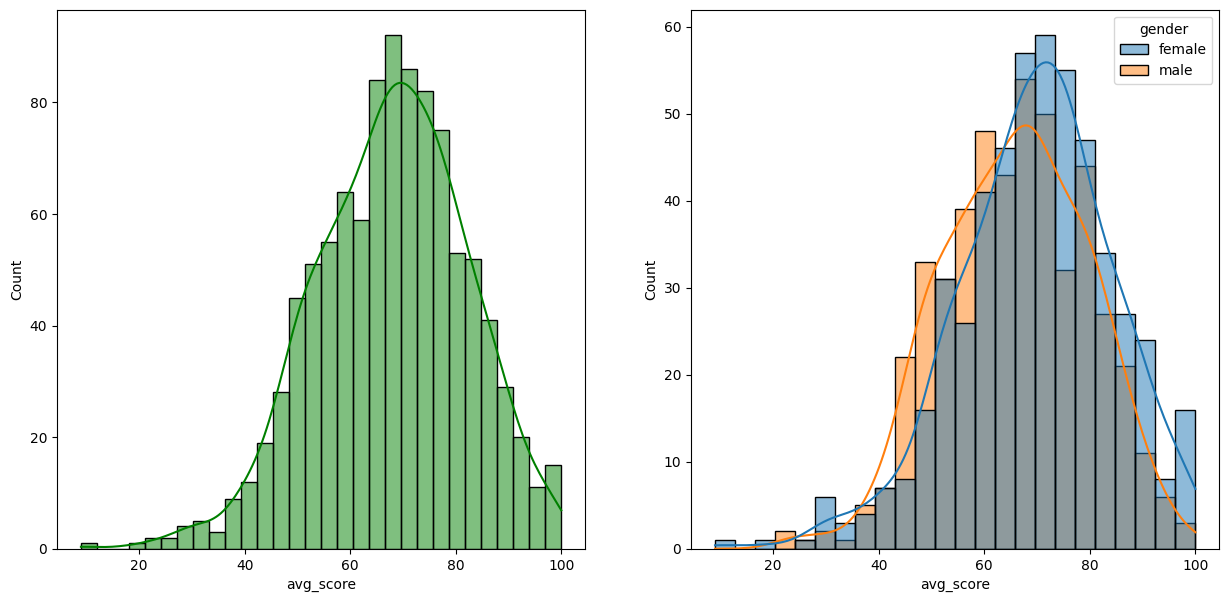

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df, x="avg_score", bins=30, kde=True, color="g")
plt.subplot(122)
sns.histplot(data=df, x="avg_score", kde=True, hue="gender")
plt.show()


#### Visualize the total score column to make some more conclusions

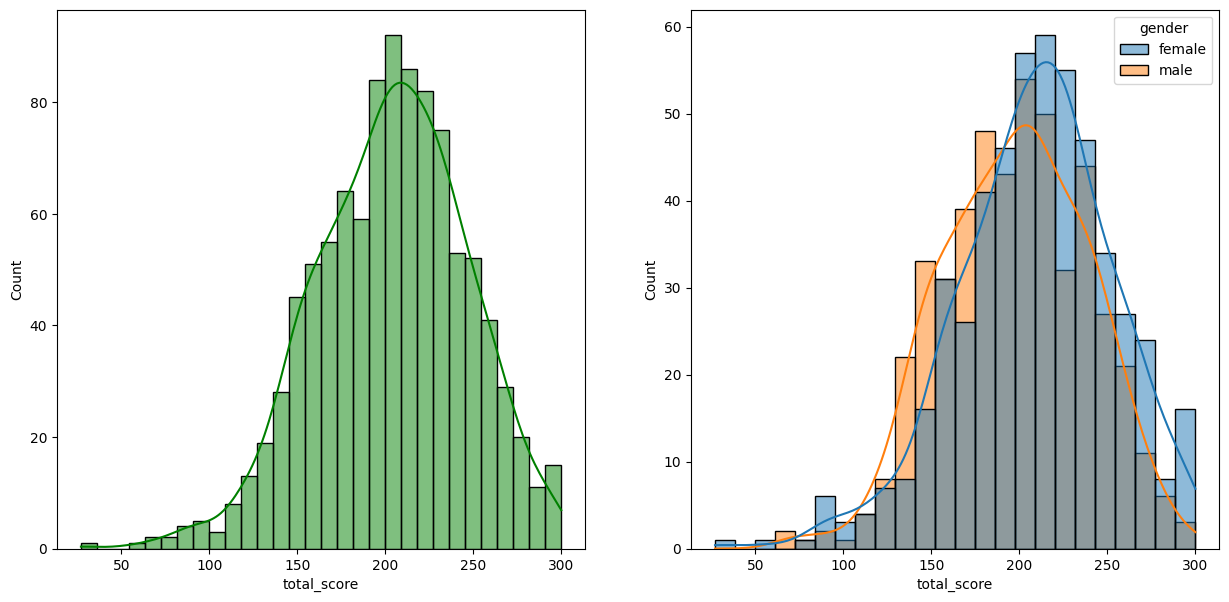

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
sns.histplot(data=df, x="total_score", bins=30, kde=True, color="g", ax=axs[0])
sns.histplot(data=df, x="total_score", kde=True, hue="gender", ax=axs[1])
plt.show()


#### Insight
- Female students tend to perform better than male students

#### Visualize average score column with respect to lunch column 
- to check if lunch has any affects on the avg score of the students
- also to check the affects with respect to the gender of students

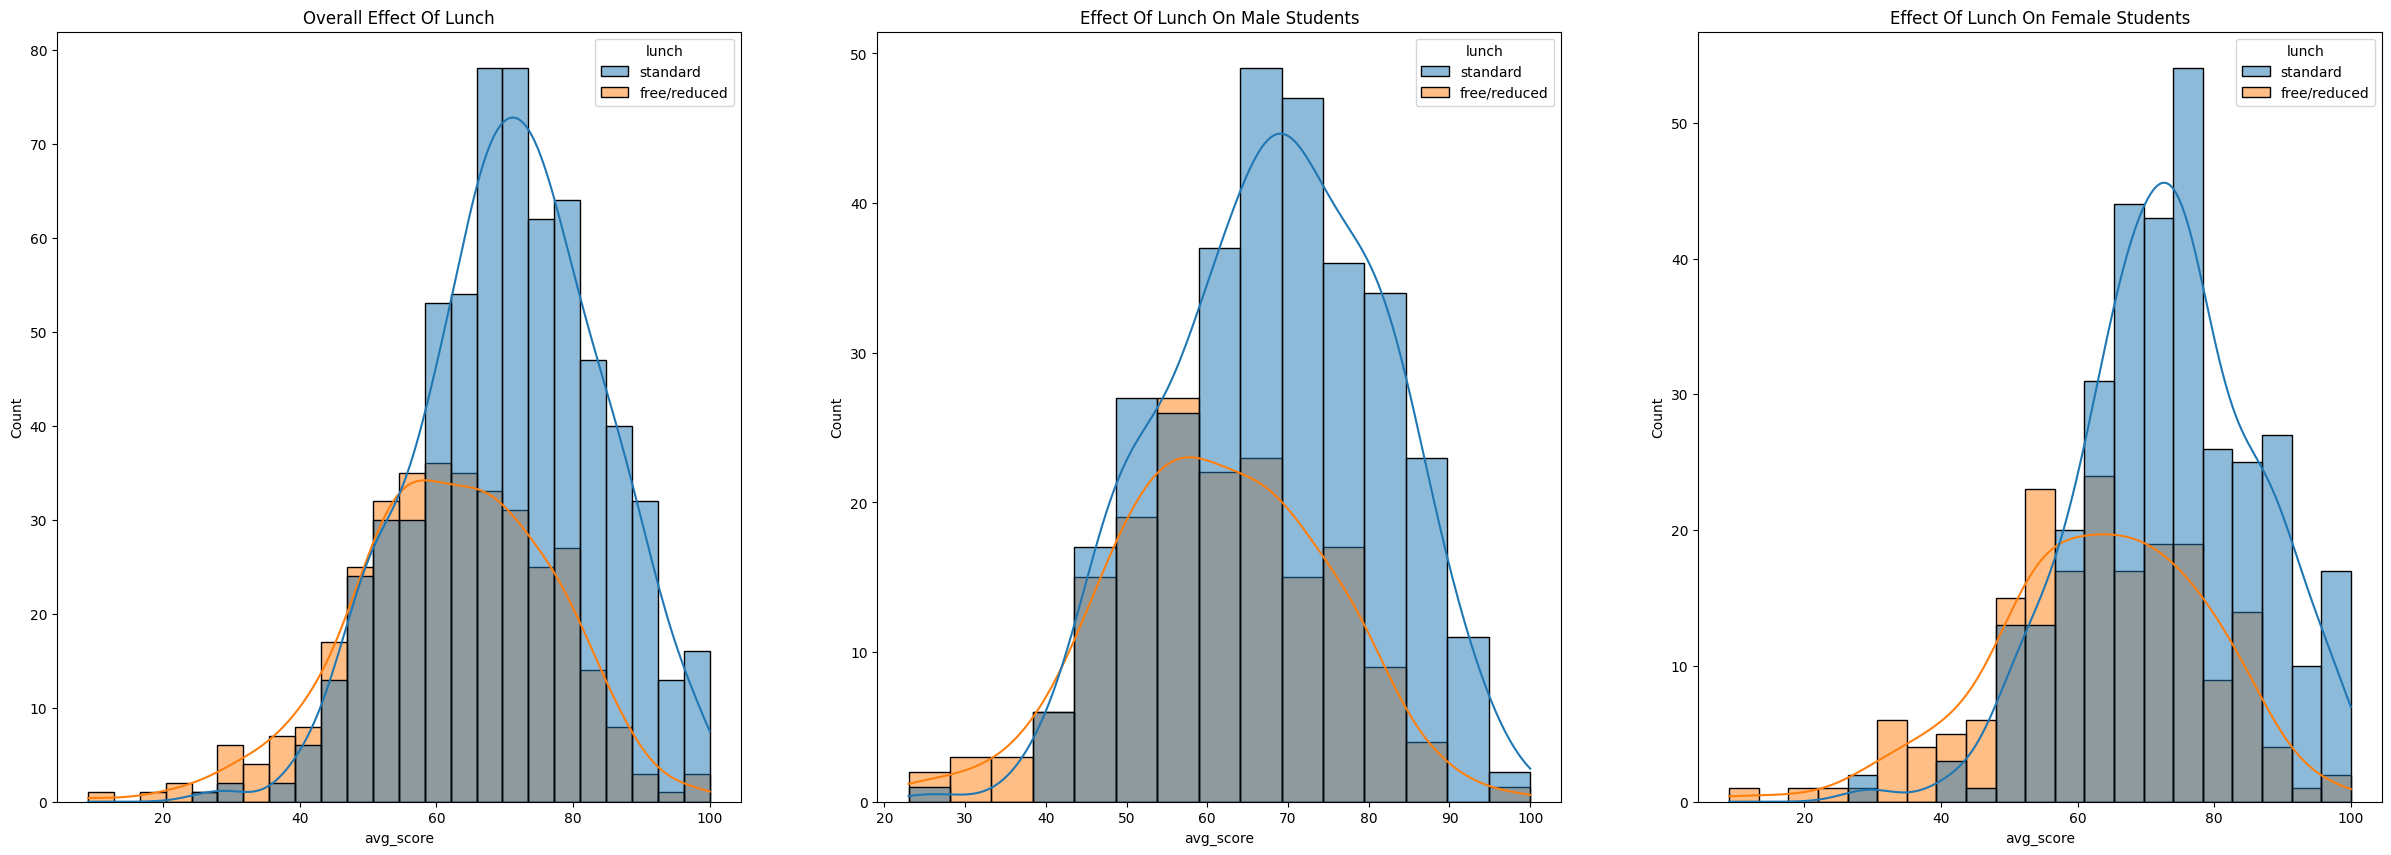

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(30, 10))
sns.histplot(data=df, x="avg_score", kde=True, hue="lunch", ax=axs[0])
axs[0].set_title("Overall Effect Of Lunch")
sns.histplot(
    data=df[df.gender == "male"], x="avg_score", kde=True, hue=df["lunch"], ax=axs[1]
)
axs[1].set_title("Effect Of Lunch On Male Students")
sns.histplot(
    data=df[df.gender == "female"], x="avg_score", kde=True, hue=df["lunch"], ax=axs[2]
)
axs[2].set_title("Effect Of Lunch On Female Students")
plt.show()

#### Insight
- Standard lunch helps perform well in exams
- Standard lunch helps perform well in exams irrespective of gender

#### Visualize Average Score Column with respect to Parent Education Column
- To see if parents education has any influence on avg score of the students
- To see if parents education has any influence on male students and female students

In [ ]:
avg_score_parent_edu = df.groupby(["parental_level_of_education", "gender"])[
    "avg_score"
].mean()
print(f"""Average score of students based on their parents education level and their gender: 
{avg_score_parent_edu}""")

Average score of students based on their parents education level and their gender: 
parental_level_of_education  gender
associate's degree           female    71.123621
                             male      67.867642
bachelor's degree            female    74.672063
                             male      68.776182
high school                  female    64.748404
                             male      61.575490
master's degree              female    73.648056
                             male      73.521304
some college                 female    71.002542
                             male      65.715741
some high school             female    65.564176
                             male      64.635568
Name: avg_score, dtype: float64


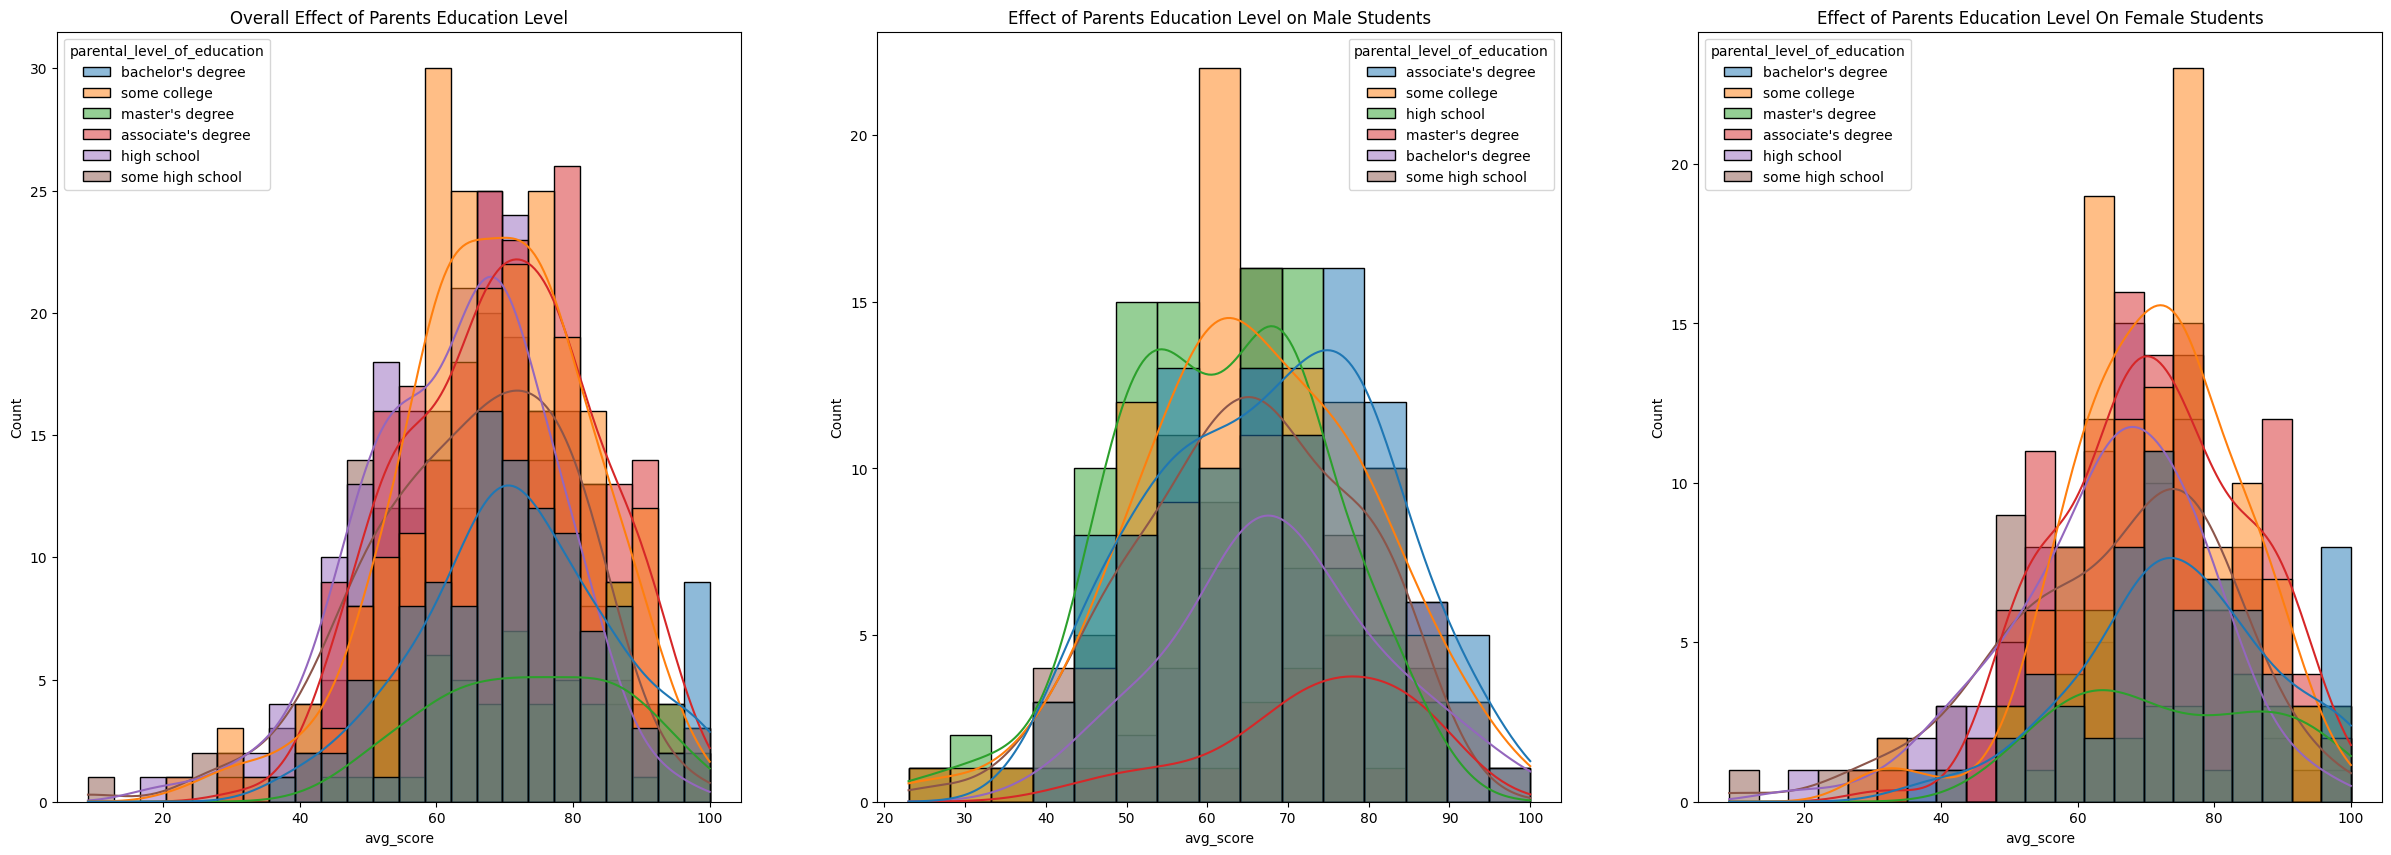

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(30, 10))
sns.histplot(
    data=df, x="avg_score", kde=True, hue="parental_level_of_education", ax=axs[0]
)
axs[0].set_title("Overall Effect of Parents Education Level")
sns.histplot(
    data=df[df.gender == "male"],
    x="avg_score",
    kde=True,
    hue="parental_level_of_education",
    ax=axs[1],
)
axs[1].set_title("Effect of Parents Education Level on Male Students")
sns.histplot(
    data=df[df.gender == "female"],
    x="avg_score",
    kde=True,
    hue="parental_level_of_education",
    ax=axs[2],
)
axs[2].set_title("Effect of Parents Education Level On Female Students")
plt.show()

#### Insight
- Overall parents education level has influence on students performance
- Students with high level of parental education tends to perform better
- Female students with high level of parents education tends to perform better than male students with high level of parents education

### Visualize Average Score Column with respect to Race_Ethnicity Column
- To Determine which race_ethnicity students are performing better

In [ ]:
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'total_score', 'avg_score'],
      dtype='object')

In [ ]:
avg_score_race_ethn = df.groupby(["race_ethnicity", "gender"])["avg_score"].mean()
print(f"""Average score of students based on their race/ethnicity and their gender: 
{avg_score_race_ethn}""")

Average score of students based on their race/ethnicity and their gender: 
race_ethnicity  gender
group A         female    65.129167
                male      61.540566
group B         female    67.510000
                male      62.999884
group C         female    68.585222
                male      65.249137
group D         female    71.439302
                male      66.987444
group E         female    74.062319
                male      71.478592
Name: avg_score, dtype: float64


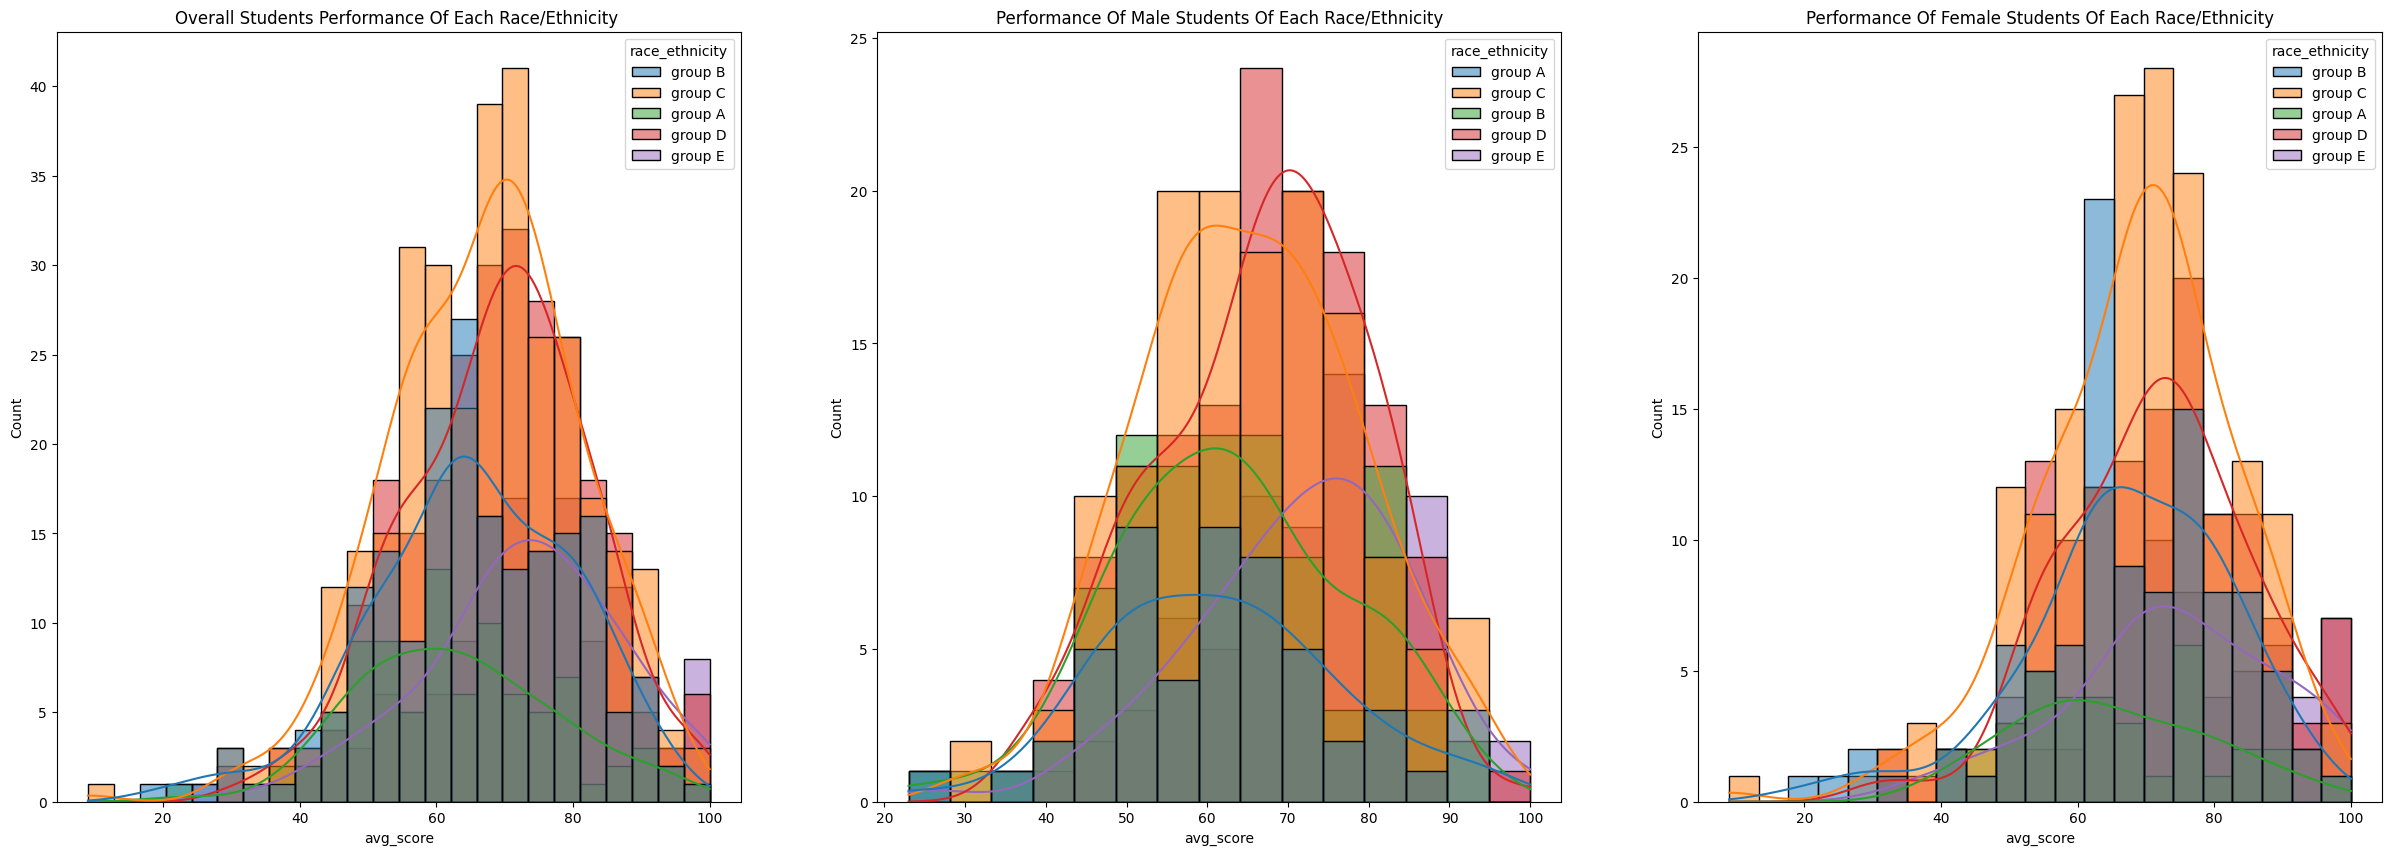

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(30, 10))
sns.histplot(data=df, x="avg_score", kde=True, hue="race_ethnicity", ax=axs[0])
axs[0].set_title("Overall Students Performance Of Each Race/Ethnicity ")
sns.histplot(
    data=df[df.gender == "male"],
    x="avg_score",
    kde=True,
    hue="race_ethnicity",
    ax=axs[1],
)
axs[1].set_title("Performance Of Male Students Of Each Race/Ethnicity")
sns.histplot(
    data=df[df.gender == "female"],
    x="avg_score",
    kde=True,
    hue="race_ethnicity",
    ax=axs[2],
)
axs[2].set_title("Performance Of Female Students Of Each Race/Ethnicity")
plt.show()


#### Insight
- Students from race/ethnicity groups A,B and C respectively are performing poorly with group A students being the worst performers overall
- Both male and female studenst from race/ethnicity groups A,B and C are performing poorly with male students being the worst performers
- Overall male students have poor performance except from race/ethnicity group E male students
- Students from race/ethnicity group D and E have good performance especially female students

>##### Q1- Why studentts from race/ethnicity groups A, B and C are performing poorly?
>##### Q2- Why male students in particular are performing poorly?

#### 4.2 Maximumum score of students in all three subjects

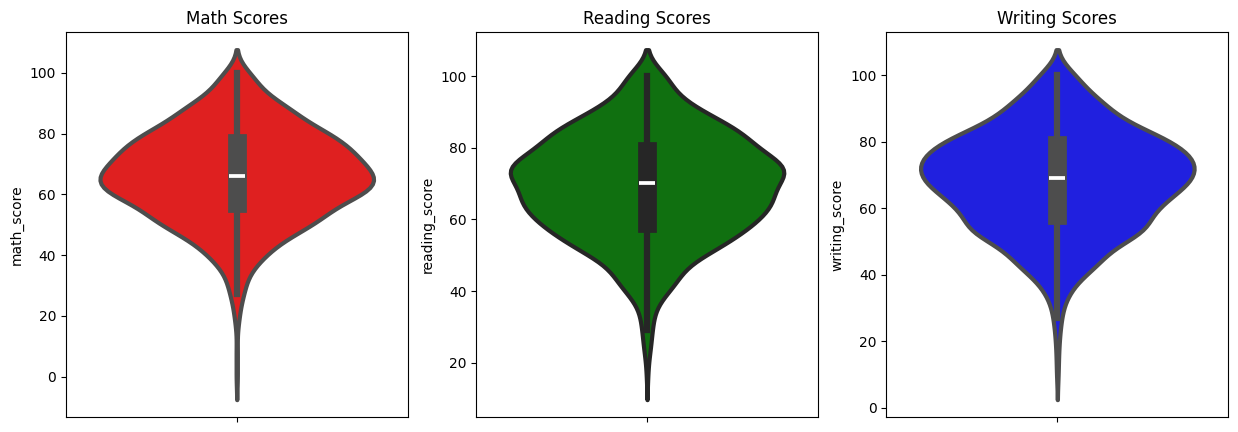

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].set_title("Math Scores")
sns.violinplot(data=df, y="math_score", color="red", linewidth=3, ax=axs[0])
axs[1].set_title("Reading Scores")
sns.violinplot(data=df, y="reading_score", color="green", linewidth=3, ax=axs[1])
axs[2].set_title("Writing Scores")
sns.violinplot(data=df, y="writing_score", color="blue", linewidth=3, ax=axs[2])
plt.show()

#### Insights
- From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80

#### 4.3 Multivariate analysis using pieplot

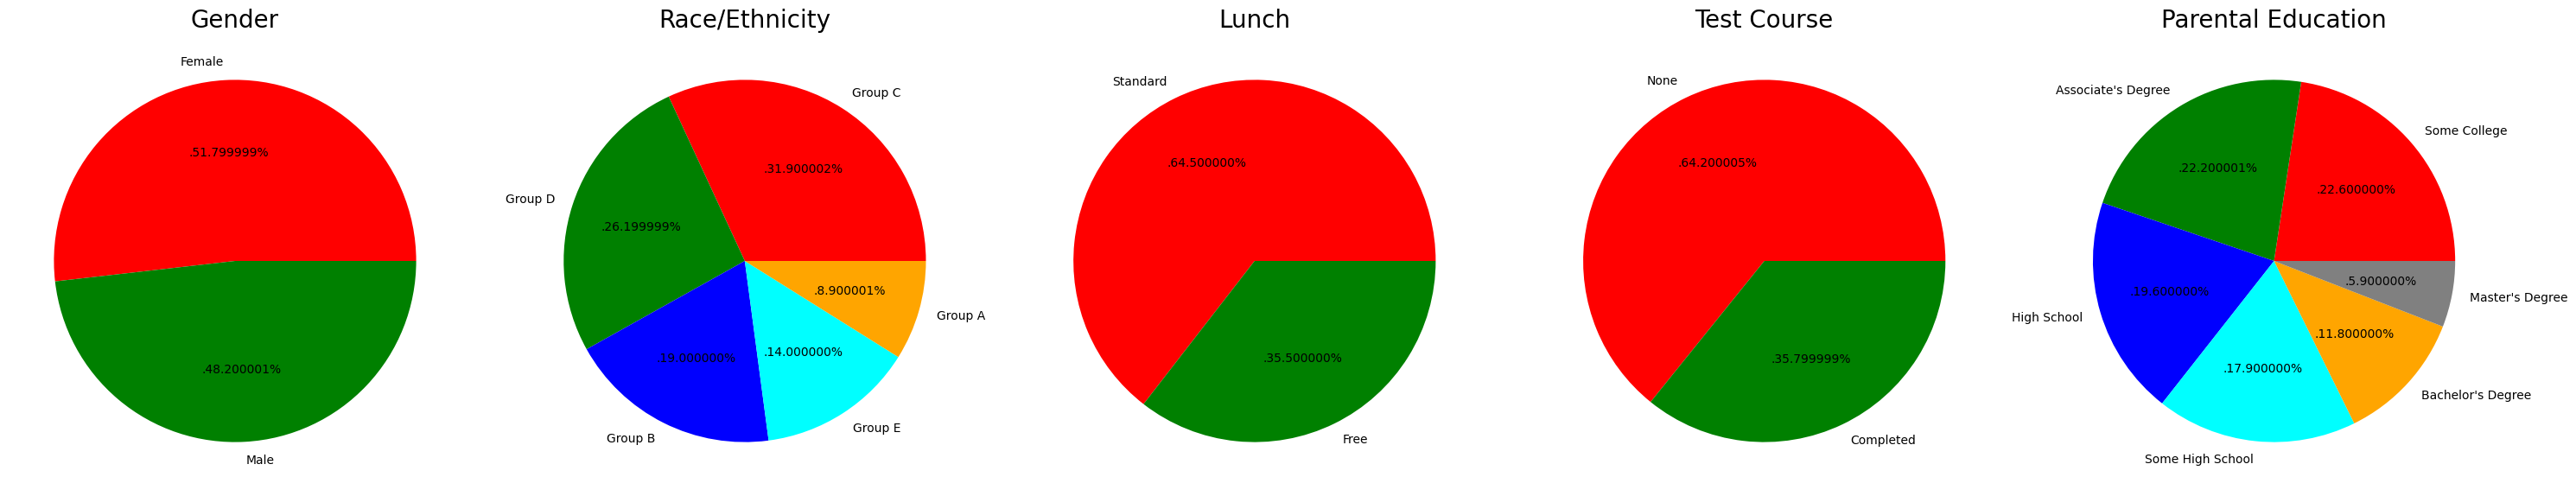

In [ ]:
plt.rcParams["figure.figsize"] = (30, 12)

plt.subplot(1, 5, 1)
size = df["gender"].value_counts()
labels = "Female", "Male"
color = ["red", "green"]


plt.pie(size, colors=color, labels=labels, autopct=".%2f%%")
plt.title("Gender", fontsize=20)
plt.axis("off")


plt.subplot(1, 5, 2)
size = df["race_ethnicity"].value_counts()
labels = "Group C", "Group D", "Group B", "Group E", "Group A"
color = ["red", "green", "blue", "cyan", "orange"]

plt.pie(size, colors=color, labels=labels, autopct=".%2f%%")
plt.title("Race/Ethnicity", fontsize=20)
plt.axis("off")


plt.subplot(1, 5, 3)
size = df["lunch"].value_counts()
labels = "Standard", "Free"
color = ["red", "green"]

plt.pie(size, colors=color, labels=labels, autopct=".%2f%%")
plt.title("Lunch", fontsize=20)
plt.axis("off")


plt.subplot(1, 5, 4)
size = df["test_preparation_course"].value_counts()
labels = "None", "Completed"
color = ["red", "green"]

plt.pie(size, colors=color, labels=labels, autopct=".%2f%%")
plt.title("Test Course", fontsize=20)
plt.axis("off")


plt.subplot(1, 5, 5)
size = df["parental_level_of_education"].value_counts()
labels = (
    "Some College",
    "Associate's Degree",
    "High School",
    "Some High School",
    "Bachelor's Degree",
    "Master's Degree",
)
color = ["red", "green", "blue", "cyan", "orange", "grey"]

plt.pie(size, colors=color, labels=labels, autopct=".%2f%%")
plt.title("Parental Education", fontsize=20)
plt.axis("off")


plt.tight_layout()
plt.grid()

plt.show()

#####  Insights
- Number of Male and Female students is almost equal
- Number students are greatest in Group C
- Number of students who have standard lunch are greater
- Number of students who have not enrolled in any test preparation course is greater
- Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"

#### 4.4 Feature Wise Visualization
#### 4.4.1 GENDER COLUMN
- How is distribution of Gender ?
- Is gender has any impact on student's performance ?

#### UNIVARIATE ANALYSIS ( How is distribution of Gender ? )

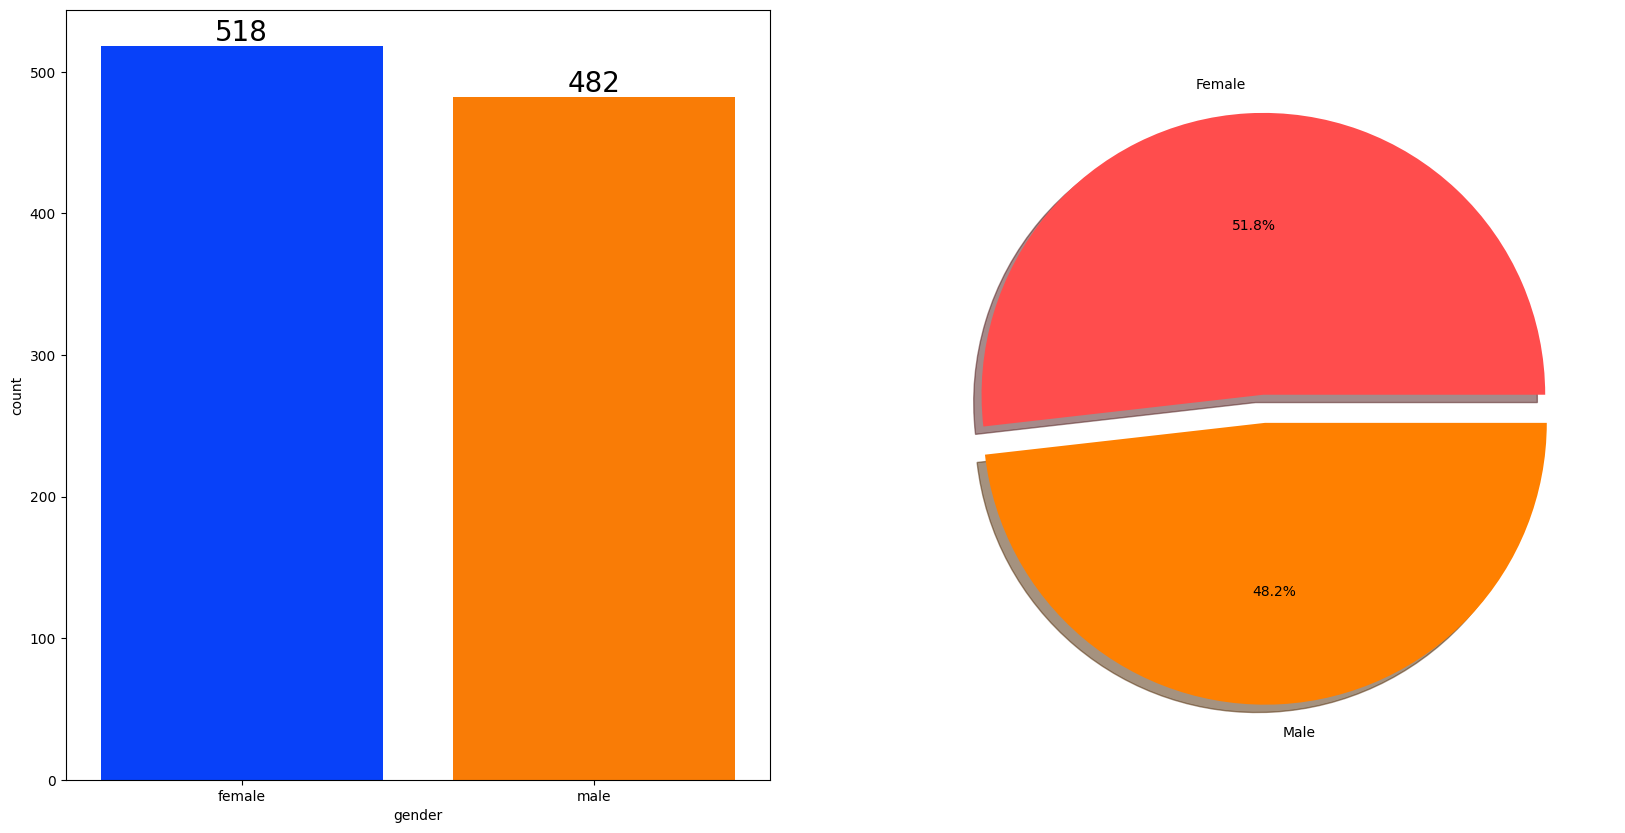

In [ ]:
f, ax = plt.subplots(1, 2, figsize=(20, 10))
sns.countplot(x=df["gender"], data=df, palette="bright", ax=ax[0], saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container, color="black", size=20)

plt.pie(
    x=df["gender"].value_counts(),
    labels=["Female", "Male"],
    explode=[0, 0.1],
    autopct="%1.1f%%",
    shadow=True,
    colors=["#ff4d4d", "#ff8000"],
)
plt.show()

#### Insights 
- Gender has balanced data with female students are 518 (52%) and male students are 482 (48.2%) 

#### BIVARIATE ANALYSIS ( Is gender has any impact on student's performance ? ) 

In [ ]:
gender_group = df.groupby("gender")["avg_score"].mean()
gender_group

gender
female    69.569498
male      65.837303
Name: avg_score, dtype: float64

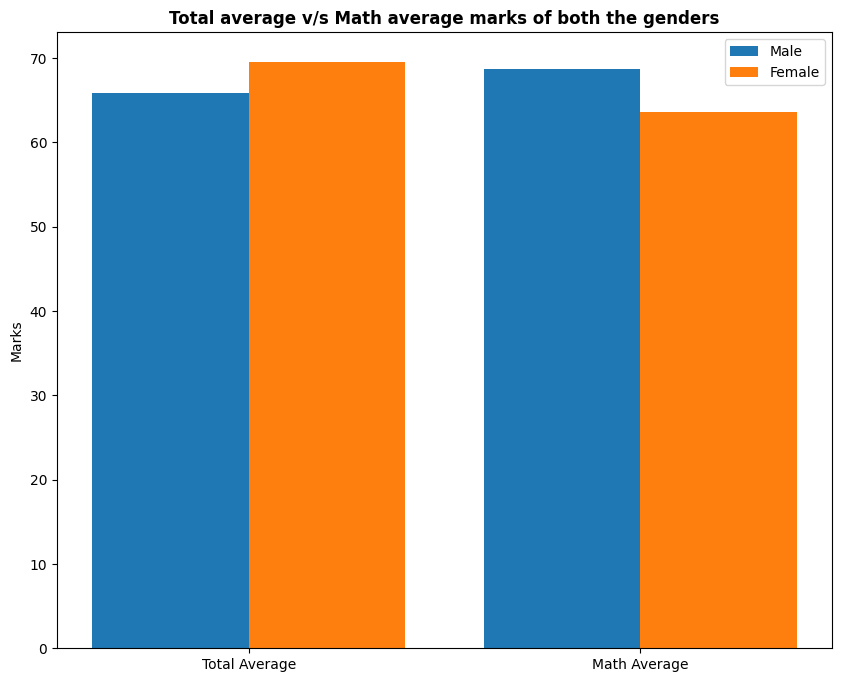

In [ ]:
plt.figure(figsize=(10, 8))

X = ["Total Average", "Math Average"]

# Get grouped data for both avg_score and math_score
gender_avg_group = df.groupby("gender")["avg_score"].mean()
gender_math_group = df.groupby("gender")["math_score"].mean()

# Access the data correctly using gender names as index
female_scores = [gender_avg_group["female"], gender_math_group["female"]]
male_scores = [gender_avg_group["male"], gender_math_group["male"]]

X_axis = np.arange(len(X))

plt.bar(X_axis - 0.2, male_scores, 0.4, label="Male")
plt.bar(X_axis + 0.2, female_scores, 0.4, label="Female")

plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight="bold")
plt.legend()
plt.show()

#### Insights 
- On an average females have a better overall score than men.
- whereas males have scored higher in Maths.

#### 4.4.2 RACE/EHNICITY COLUMN
- How is Group wise distribution ?
- Is Race/Ehnicity has any impact on student's performance ?

#### UNIVARIATE ANALYSIS ( How is Group wise distribution ?)

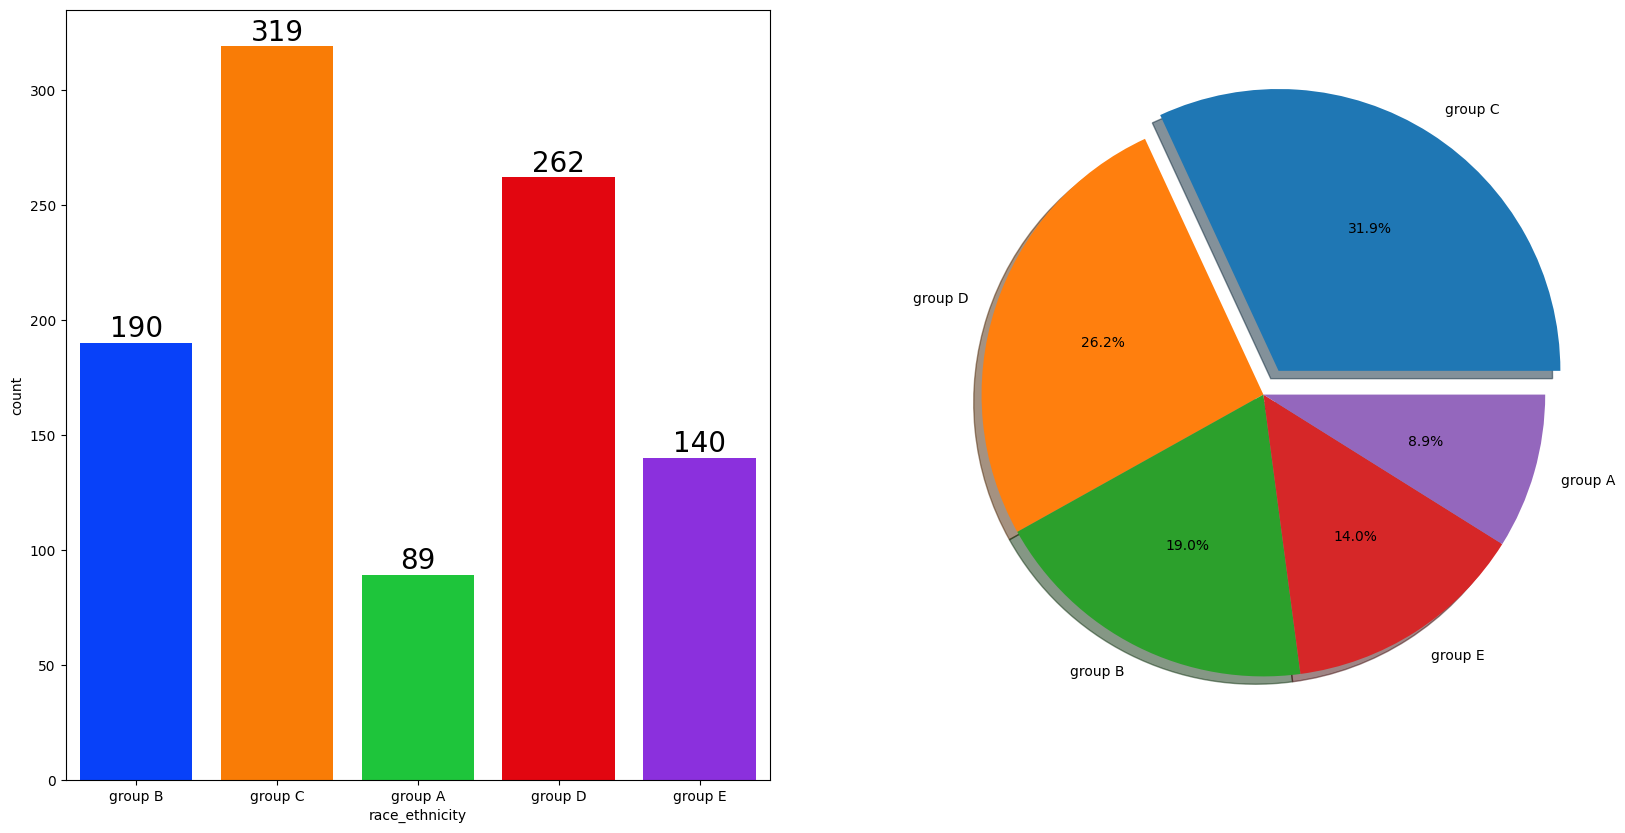

In [ ]:
f, ax = plt.subplots(1, 2, figsize=(20, 10))
sns.countplot(
    x=df["race_ethnicity"], data=df, palette="bright", ax=ax[0], saturation=0.95
)
for container in ax[0].containers:
    ax[0].bar_label(container, color="black", size=20)

plt.pie(
    x=df["race_ethnicity"].value_counts(),
    labels=df["race_ethnicity"].value_counts().index,
    explode=[0.1, 0, 0, 0, 0],
    autopct="%1.1f%%",
    shadow=True,
)
plt.show()

#### Insights 
- Most of the student belonging from group C /group D.
- Lowest number of students belong to groupA.

#### BIVARIATE ANALYSIS ( Is Race/Ehnicity has any impact on student's performance ? )

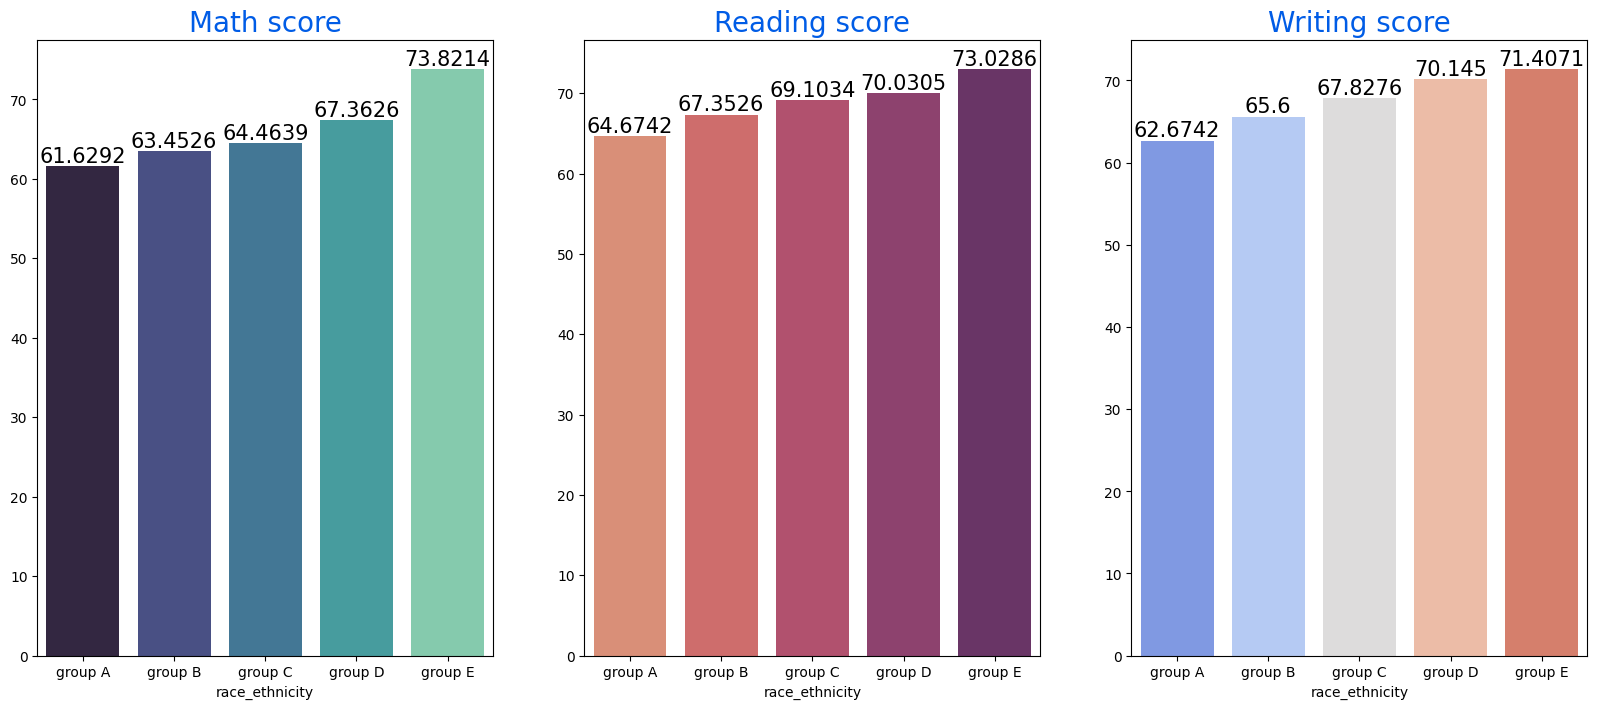

In [ ]:
Group_data2 = df.groupby("race_ethnicity")
f, ax = plt.subplots(1, 3, figsize=(20, 8))
sns.barplot(
    x=Group_data2["math_score"].mean().index,
    y=Group_data2["math_score"].mean().values,
    palette="mako",
    ax=ax[0],
)
ax[0].set_title("Math score", color="#005ce6", size=20)

for container in ax[0].containers:
    ax[0].bar_label(container, color="black", size=15)

sns.barplot(
    x=Group_data2["reading_score"].mean().index,
    y=Group_data2["reading_score"].mean().values,
    palette="flare",
    ax=ax[1],
)
ax[1].set_title("Reading score", color="#005ce6", size=20)

for container in ax[1].containers:
    ax[1].bar_label(container, color="black", size=15)

sns.barplot(
    x=Group_data2["writing_score"].mean().index,
    y=Group_data2["writing_score"].mean().values,
    palette="coolwarm",
    ax=ax[2],
)
ax[2].set_title("Writing score", color="#005ce6", size=20)

for container in ax[2].containers:
    ax[2].bar_label(container, color="black", size=15)
plt.show()

#### Insights 
- Group E students have scored the highest marks. 
- Group A students have scored the lowest marks. 
- Students from a lower Socioeconomic status have a lower avg in all course subjects

#### 4.4.3 PARENTAL LEVEL OF EDUCATION COLUMN
- What is educational background of student's parent ?
- Is parental education has any impact on student's performance ?

#### UNIVARIATE ANALYSIS ( What is educational background of student's parent ? )

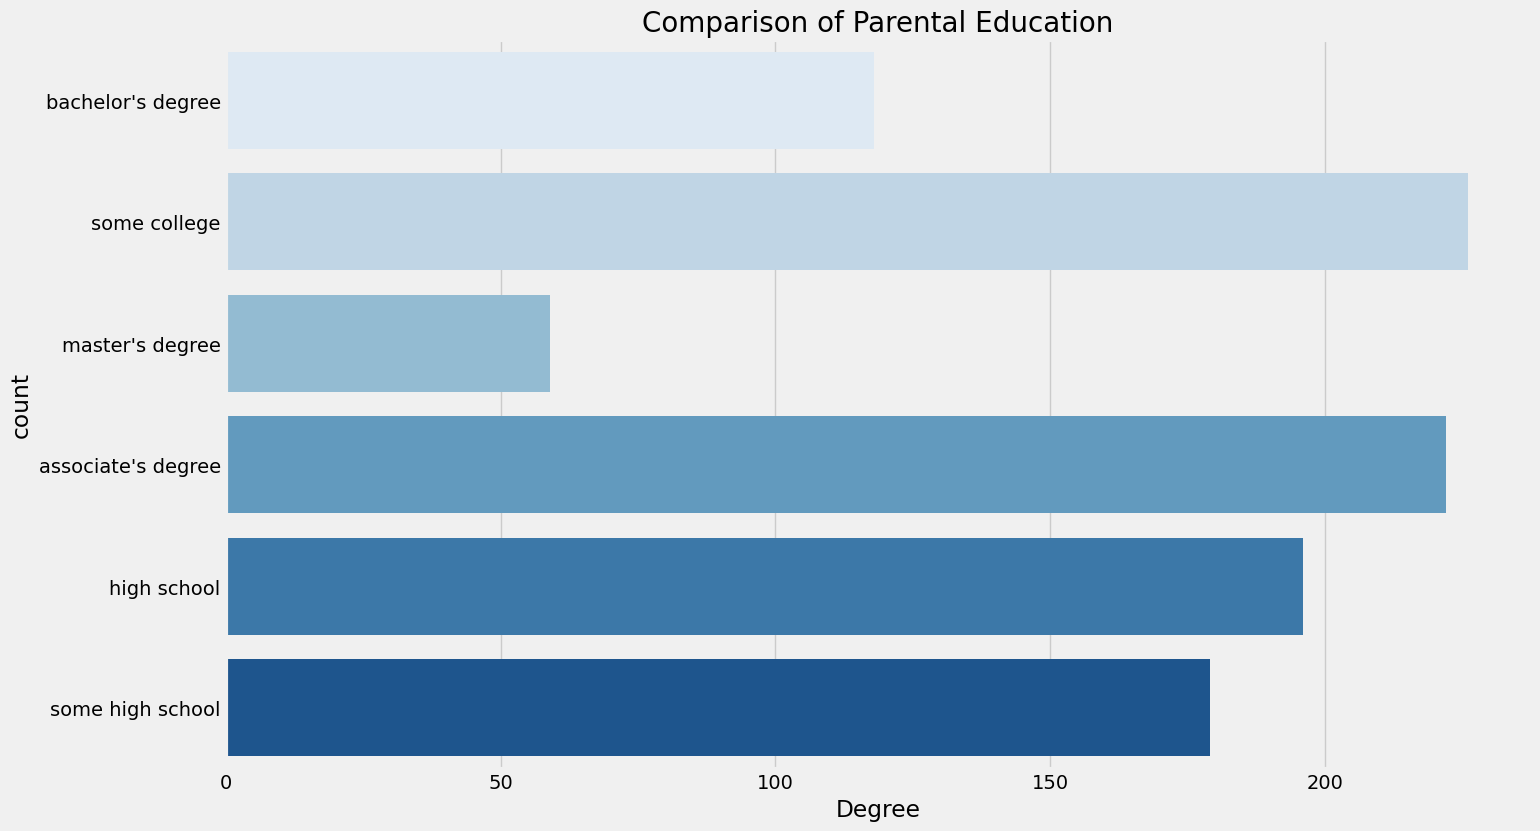

In [ ]:
plt.rcParams["figure.figsize"] = (15, 9)
plt.style.use("fivethirtyeight")
sns.countplot(df["parental_level_of_education"], palette="Blues")
plt.title("Comparison of Parental Education", fontweight=30, fontsize=20)
plt.xlabel("Degree")
plt.ylabel("count")
plt.show()

#### Insights 
- Largest number of parents are from some college.

#### BIVARIATE ANALYSIS ( Is parental education has any impact on student's performance ? )

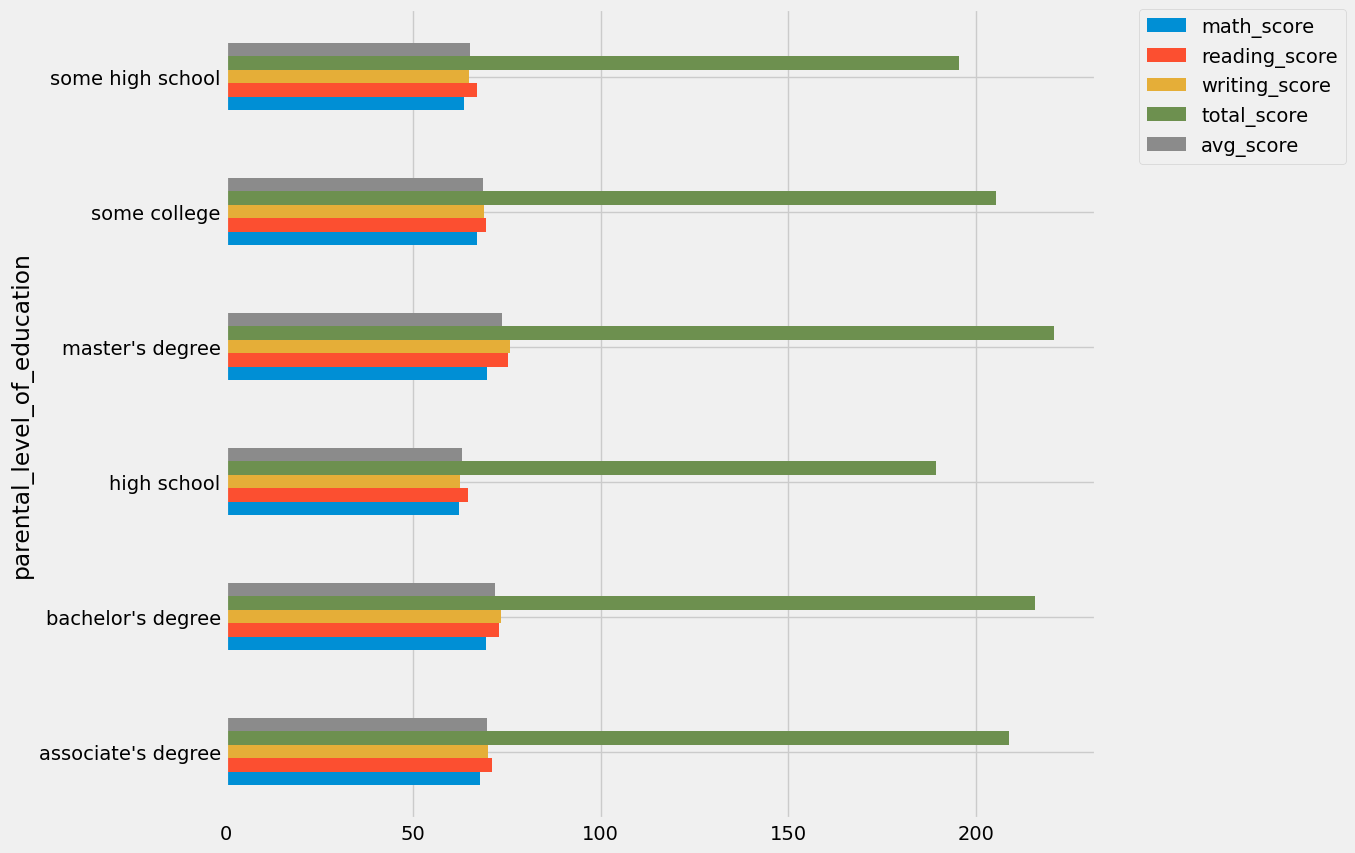

In [ ]:
df.groupby("parental_level_of_education")[
    numerical_features + ["total_score", "avg_score"]
].agg("mean").plot(kind="barh", figsize=(10, 10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)
plt.show()

#### Insights 
- The score of student whose parents possess master and bachelor level education are higher than others.

#### 4.4.4 LUNCH COLUMN 
- Which type of lunch is most common amoung students ?
- What is the effect of lunch type on test results?


#### UNIVARIATE ANALYSIS ( Which type of lunch is most common amoung students ? )

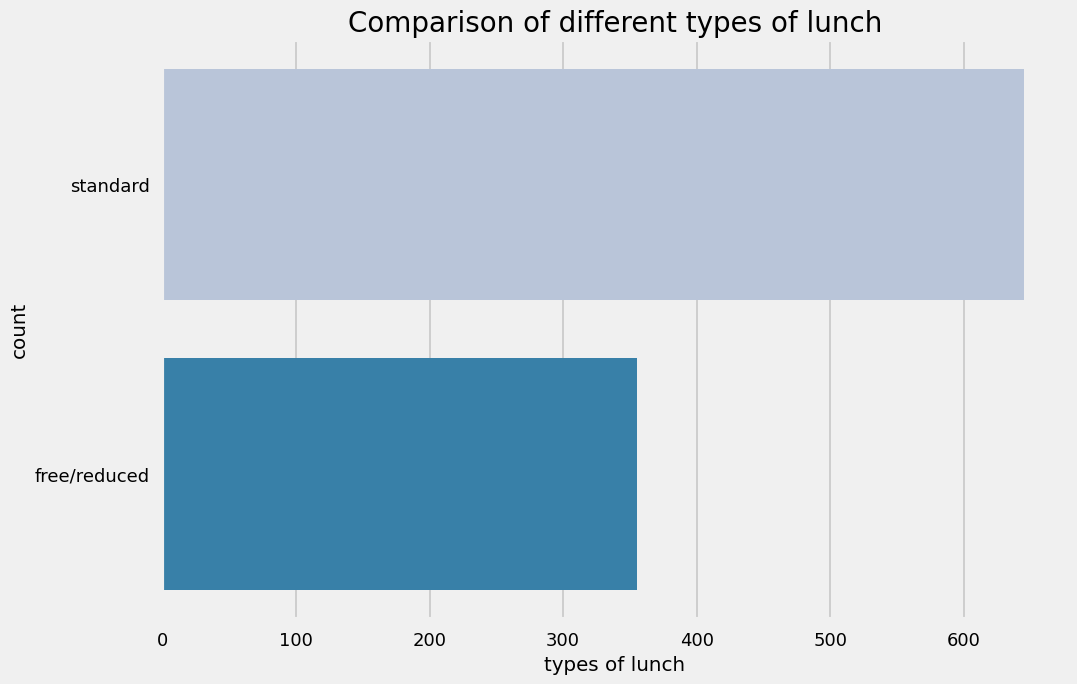

In [ ]:
plt.rcParams["figure.figsize"] = (15, 9)
plt.style.use("seaborn-v0_8-talk")
sns.countplot(df["lunch"], palette="PuBu")
plt.title("Comparison of different types of lunch", fontweight=30, fontsize=20)
plt.xlabel("types of lunch")
plt.ylabel("count")
plt.show()

#### Insights 
- Students being served Standard lunch was more than free lunch

#### BIVARIATE ANALYSIS (  Is lunch type intake has any impact on student's performance ? )

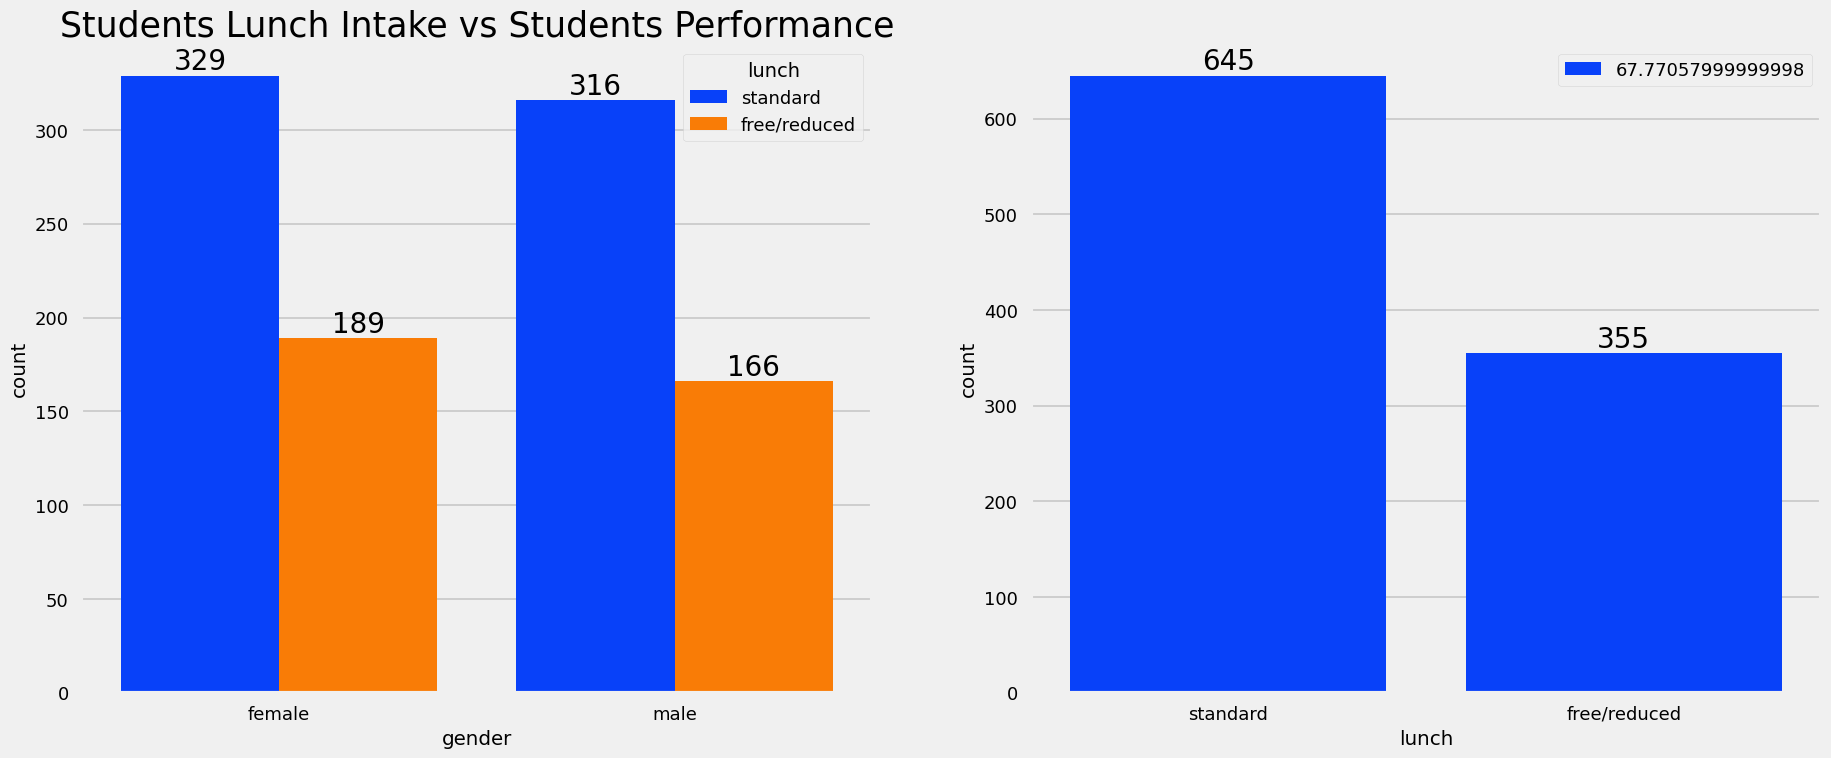

In [55]:
f, ax = plt.subplots(1, 2, figsize=(20, 8))
sns.countplot(
    x=df["gender"],
    data=df,
    palette="bright",
    hue="lunch",
    saturation=0.95,
    ax=ax[0],
)
ax[0].set_title("Students vs Lunch Intake ", color="black", size=25)
for container in ax[0].containers:
    ax[0].bar_label(container, color="black", size=20)

sns.countplot(
    x=df["lunch"],
    data=df,
    palette="bright",
    hue=df["avg_score"].mean(),
    saturation=0.95,
    ax=ax[1],
)
ax[0].set_title("Students Lunch Intake vs Students Performance", color="black", size=25)
for container in ax[1].containers:
    ax[1].bar_label(container, color="black", size=20)
plt.show()

#### Insights 
- Students who get Standard Lunch tend to perform better than students who got free/reduced lunch

#### 4.4.5 TEST PREPARATION COURSE COLUMN 
- Which type of lunch is most common amoung students ?
- Is Test prepration course has any impact on student's performance ?

#### BIVARIATE ANALYSIS ( Is Test prepration course has any impact on student's performance ? )

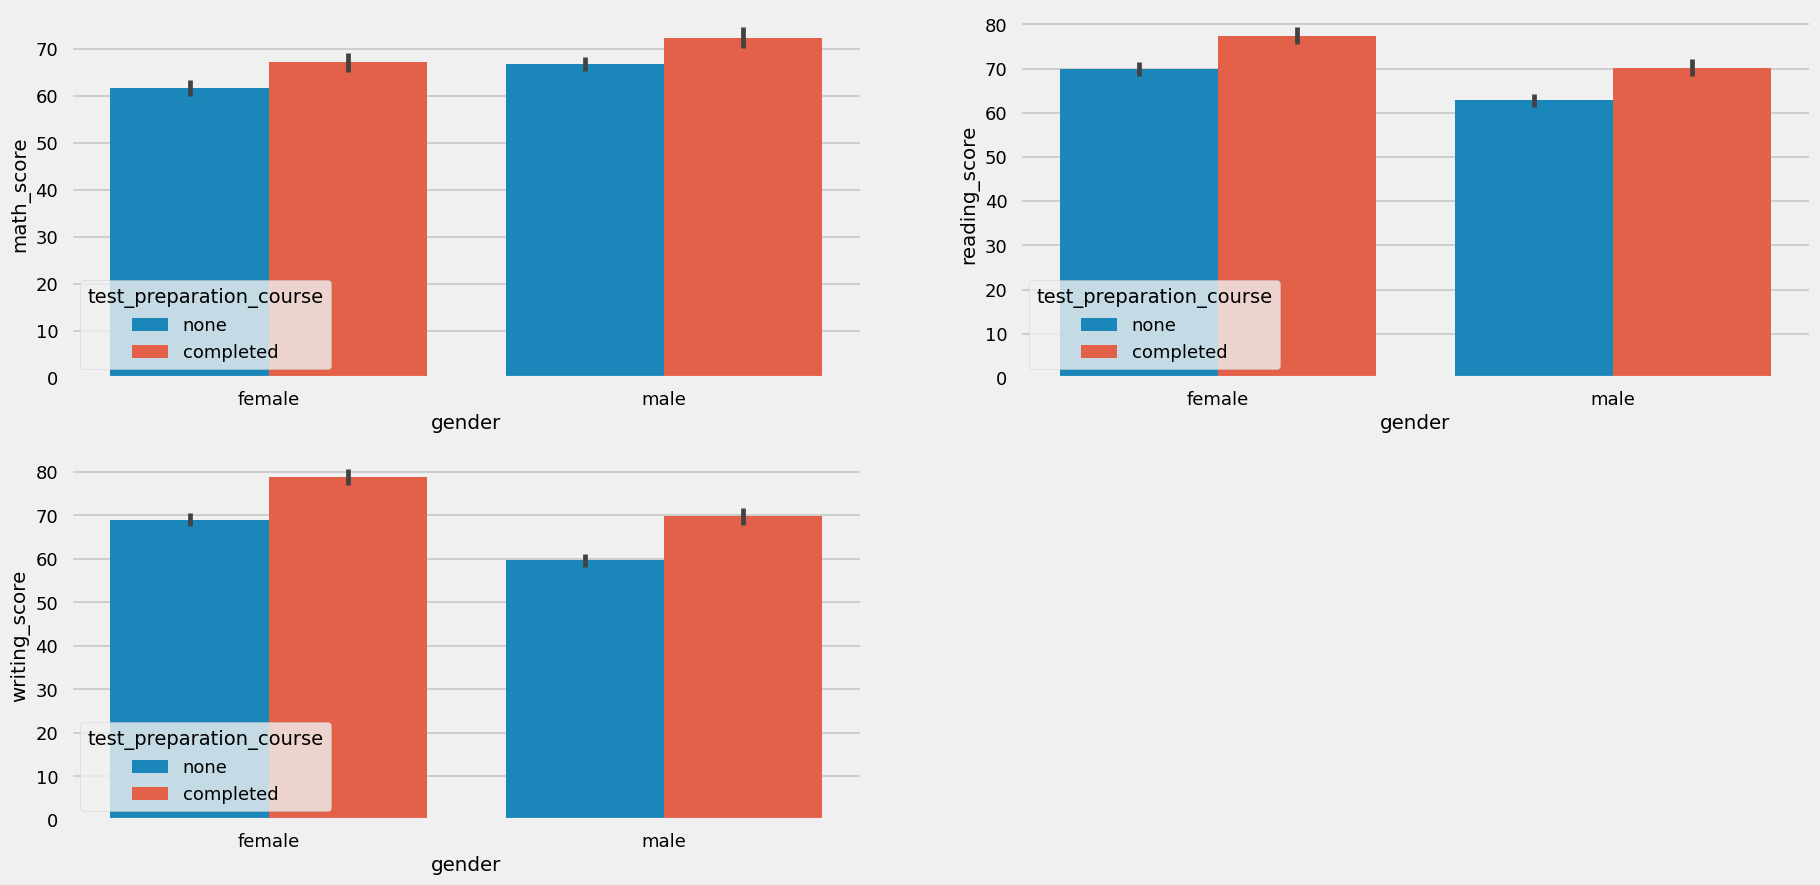

In [41]:
plt.figure(figsize=(20, 10))
plt.subplot(2, 2, 1)
sns.barplot(x=df["gender"], y=df["math_score"], hue=df["test_preparation_course"])
plt.subplot(2, 2, 2)
sns.barplot(x=df["gender"], y=df["reading_score"], hue=df["test_preparation_course"])
plt.subplot(2, 2, 3)
sns.barplot(x=df["gender"], y=df["writing_score"], hue=df["test_preparation_course"])
plt.show()

#### Insights  
- Students who have completed the Test Prepration Course have scores higher in all three categories than those who haven't taken the course

#### 4.4.6 CHECKING OUTLIERS

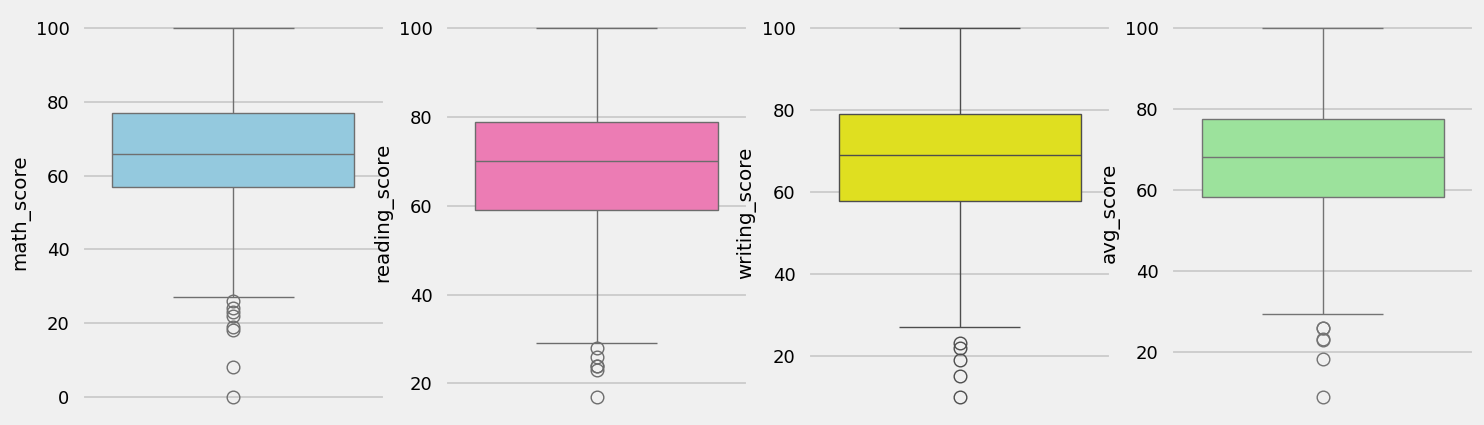

In [ ]:
plt.subplots(1, 4, figsize=(16, 5))
plt.subplot(141)
sns.boxplot(df["math_score"], color="skyblue")
plt.subplot(142)
sns.boxplot(df["reading_score"], color="hotpink")
plt.subplot(143)
sns.boxplot(df["writing_score"], color="yellow")
plt.subplot(144)
sns.boxplot(df["avg_score"], color="lightgreen")
plt.show()

#### 4.4.7 MUTIVARIATE ANALYSIS USING PAIRPLOT

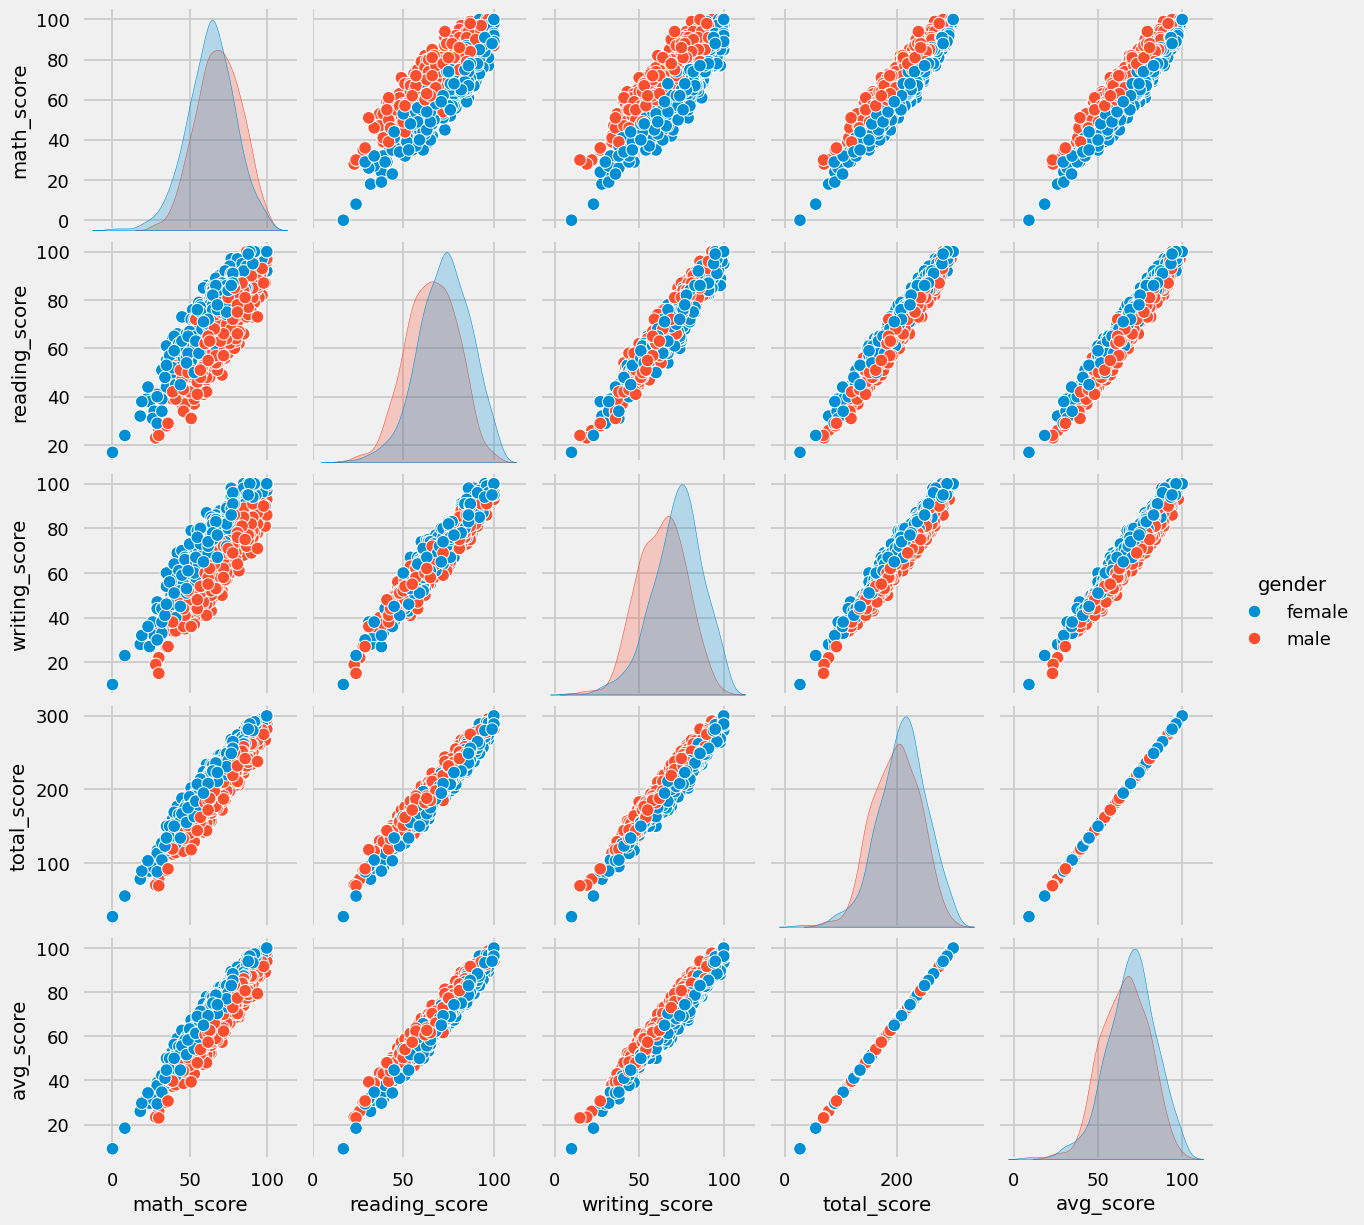

In [ ]:
sns.pairplot(df, hue="gender")
plt.show()

#### Insights
- From the above plot it is clear that all the scores increase linearly with each other.

### 5. Conclusions
- Student's Performance is related with lunch, race, parental level education
- Females lead in pass percentage and also are top-scorers
- Finishing preparation course is benefitial.